<a href="https://colab.research.google.com/github/Jyoti-S-Shukla/Deep-learning-models/blob/main/RBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Restricted Boltzmann Machine

<!-- Name : Jyoti S. Shukla

Roll Number : 211022003 -->

References : 

1. MNIST Dataset : http://yann.lecun.com/exdb/mnist/
2. Movie Lens Dataset : https://grouplens.org/datasets/movielens/
3. https://towardsdatascience.com/restricted-boltzmann-machine-how-to-create-a-recommendation-system-for-movie-review-45599a406deb
4. https://towardsdatascience.com/restricted-boltzmann-machine-as-a-recommendation-system-for-movie-review-part-2-9a6cab91d85b
5. https://github.com/echen/restricted-boltzmann-machines

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Problem 1** : MNIST Digit Classification using RBM + Logistic Regression 

1. Consider MNIST Digit Dataset
2. Use the Bernoulli RBM API from Sci-kit learn package and create a pipeline of RBM network and logistic regression to classify the digits

##Write down the Objectives, Hypothesis and Experimental description for the above problem


**Objective:** To classify the mnist dataset using bernoulli RBM.

**Hypothesis:** The RBM extractor should produce fine results. The classification will be done using logistic regression.

**Experimental Description:**

1. Load the dataset for mnist.
2. If the dataset is small, nudge it to increase the number of samples, scale the trainig data in 0 to 1 range.
3. Using sckit learn bernoulli RBM api, develop the RBM model.
4. Fit the training data and predict on test data, plot the results. 

**Bernoulli Restricted Boltzmann Machine**

A Restricted Boltzmann Machine with binary visible units and binary hidden units. Parameters are estimated using Stochastic Maximum Likelihood (SML), also known as Persistent Contrastive Divergence (PCD).
RBM uses this method to adjust its weights. Using some randomly assigned initial weights, RBM calculates the hidden nodes, which in turn use the same weights to reconstruct the input nodes.
The process continues until the reconstructed input matches the previous input. The process is said to be converged at this stage. This entire procedure is known as Gibbs Sampling. 

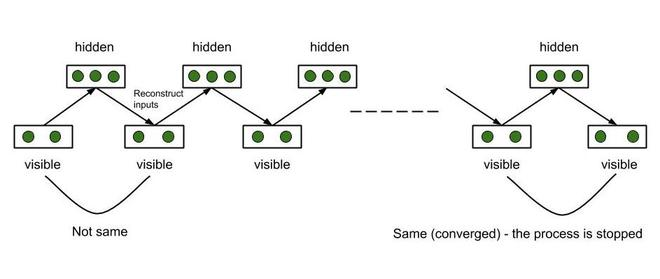



## Programming : 
  Please write a program to demonstrate the same

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import convolve
from sklearn import linear_model, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import minmax_scale
from sklearn.base import clone



In [ ]:

# #############################################################################
# Setting up


def nudge_dataset(X, Y):
    """
    This produces a dataset 5 times bigger than the original one,
    by moving the 8x8 images in X around by 1px to left, right, down, up
    """
    direction_vectors = [
        [[0, 1, 0], [0, 0, 0], [0, 0, 0]],
        [[0, 0, 0], [1, 0, 0], [0, 0, 0]],
        [[0, 0, 0], [0, 0, 1], [0, 0, 0]],
        [[0, 0, 0], [0, 0, 0], [0, 1, 0]],
    ]

    def shift(x, w):
        return convolve(x.reshape((28, 28)), mode="constant", weights=w).ravel()

    X = np.concatenate(
        [X] + [np.apply_along_axis(shift, 1, X, vector) for vector in direction_vectors]
    )
    Y = np.concatenate([Y for _ in range(5)], axis=0)
    return X, Y



In [ ]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()


In [ ]:

#after nudging the data
train_X = np.asarray(train_X, "float32").reshape((*train_X.shape[:-2], -1))
print(train_X.shape)
test_X = np.asarray(test_X, "float32").reshape((*test_X.shape[:-2], -1))
X_train, Y_train = nudge_dataset(train_X, train_y)
X_test, Y_test = nudge_dataset(test_X, test_y)
print(X_train.shape)

(60000, 784)
(300000, 784)


In [ ]:
# no need to nudge the dataset as its already a large dataset
train_X = np.asarray(train_X, "float32").reshape((*train_X.shape[:-2], -1))
print(train_X.shape)
test_X = np.asarray(test_X, "float32").reshape((*test_X.shape[:-2], -1))
X_train = minmax_scale(train_X, feature_range=(0, 1))  # 0-1 scaling
X_test = minmax_scale(test_X, feature_range=(0, 1))  # 0-1 scaling
Y_train = train_y
Y_test = test_y

(60000, 784)


In [ ]:
#@title
# Load Data
X, y = datasets.load_digits(return_X_y=True)
X = np.asarray(X, "float32")
X, Y = nudge_dataset(X, y)
X = minmax_scale(X, feature_range=(0, 1))  # 0-1 scaling

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


In [ ]:

# Models we will use
logistic = linear_model.LogisticRegression(solver="newton-cg", tol=1)
rbm = BernoulliRBM(random_state=0, verbose=True)

rbm_features_classifier = Pipeline(steps=[("rbm", rbm), ("logistic", logistic)])


In [ ]:

# #############################################################################
# Training

# Hyper-parameters. These were set by cross-validation,
# using a GridSearchCV. Here we are not performing cross-validation to
# save time.
rbm.learning_rate = 0.06
rbm.n_iter = 10
# More components tend to give better prediction performance, but larger
# fitting time
rbm.n_components = 100
logistic.C = 6000

# Training RBM-Logistic Pipeline
rbm_features_classifier.fit(X_train, Y_train)
#rbm_features_classifier.fit(train, label)
# Training the Logistic regression classifier directly on the pixel
raw_pixel_classifier = clone(logistic)
raw_pixel_classifier.C = 100.0
raw_pixel_classifier.fit(X_train, Y_train)
#raw_pixel_classifier.fit(train, label)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -97.01, time = 11.25s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -93.56, time = 12.66s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -92.66, time = 12.59s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -91.27, time = 12.68s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -92.43, time = 13.43s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -93.67, time = 12.64s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -90.74, time = 14.16s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -89.35, time = 12.62s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -90.42, time = 12.59s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -88.19, time = 12.59s


LogisticRegression(C=100.0, solver='newton-cg', tol=1)

In [ ]:
# #############################################################################
# Evaluation

Y_pred = rbm_features_classifier.predict(X_test)
print(
    "Logistic regression using RBM features:\n%s\n"
    % (metrics.classification_report(Y_test, Y_pred))
)




Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.93      0.92      0.92      1032
           3       0.92      0.92      0.92      1010
           4       0.95      0.93      0.94       982
           5       0.92      0.91      0.91       892
           6       0.96      0.96      0.96       958
           7       0.94      0.93      0.93      1028
           8       0.90      0.92      0.91       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000




In [ ]:
Y_pred = raw_pixel_classifier.predict(X_test)
print(
    "Logistic regression using raw pixel features:\n%s\n"
    % (metrics.classification_report(Y_test, Y_pred))
)

Logistic regression using raw pixel features:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.97      0.96      1135
           2       0.92      0.89      0.90      1032
           3       0.90      0.91      0.91      1010
           4       0.93      0.93      0.93       982
           5       0.89      0.87      0.88       892
           6       0.94      0.95      0.94       958
           7       0.93      0.92      0.93      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000




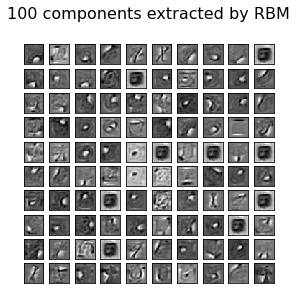

In [ ]:
# #############################################################################
# Plotting

plt.figure(figsize=(4.2, 4))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.gray_r, interpolation="nearest")
    plt.xticks(())
    plt.yticks(())
plt.suptitle("100 components extracted by RBM", fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()

In [ ]:
Y_pred, Y_test

(array([7, 2, 1, ..., 4, 5, 6], dtype=uint8),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

In [ ]:
rbm.components_

array([[-0.08573899, -0.11113202, -0.08151803, ..., -0.11946346,
        -0.11342055, -0.10393356],
       [-0.22162002, -0.20253111, -0.18493228, ..., -0.19506724,
        -0.22032739, -0.1752454 ],
       [-0.15058671, -0.1882281 , -0.20176977, ..., -0.1560706 ,
        -0.15143041, -0.18140411],
       ...,
       [-0.15567493, -0.19749565, -0.14655223, ..., -0.16821308,
        -0.14661281, -0.16319925],
       [-0.27019298, -0.2805167 , -0.26720586, ..., -0.27457386,
        -0.28615817, -0.2712041 ],
       [-0.13331044, -0.11921173, -0.13166665, ..., -0.14765768,
        -0.13867742, -0.12918077]], dtype=float32)

# Training with lr =0.1

In [ ]:
# #############################################################################
# Training

# Hyper-parameters. These were set by cross-validation,
# using a GridSearchCV. Here we are not performing cross-validation to
# save time.
rbm.learning_rate = 0.1
rbm.n_iter = 10
# More components tend to give better prediction performance, but larger
# fitting time
rbm.n_components = 100
logistic.C = 6000

# Training RBM-Logistic Pipeline
rbm_features_classifier.fit(X_train, Y_train)
#rbm_features_classifier.fit(train, label)
# Training the Logistic regression classifier directly on the pixel
raw_pixel_classifier = clone(logistic)
raw_pixel_classifier.C = 100.0
raw_pixel_classifier.fit(X_train, Y_train)
#raw_pixel_classifier.fit(train, label)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -101.63, time = 11.20s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -99.65, time = 11.83s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -103.63, time = 11.81s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -97.27, time = 11.71s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -97.83, time = 11.76s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -99.36, time = 11.72s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -96.99, time = 11.61s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -95.39, time = 11.38s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -93.05, time = 11.40s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -97.18, time = 11.37s


LogisticRegression(C=100.0, solver='newton-cg', tol=1)

In [ ]:
# #############################################################################
# Evaluation

Y_pred = rbm_features_classifier.predict(X_test)
print(
    "Logistic regression using RBM features:\n%s\n"
    % (metrics.classification_report(Y_test, Y_pred))
)
Y_pred = raw_pixel_classifier.predict(X_test)
print(
    "Logistic regression using raw pixel features:\n%s\n"
    % (metrics.classification_report(Y_test, Y_pred))
)

Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.99      0.98      0.98      1135
           2       0.94      0.93      0.94      1032
           3       0.91      0.91      0.91      1010
           4       0.94      0.92      0.93       982
           5       0.91      0.90      0.90       892
           6       0.95      0.97      0.96       958
           7       0.96      0.92      0.94      1028
           8       0.87      0.90      0.89       974
           9       0.90      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000


Logistic regression using raw pixel features:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.97      0.96  

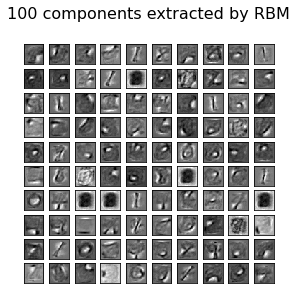

In [ ]:
# #############################################################################
# Plotting

plt.figure(figsize=(4.2, 4))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.gray_r, interpolation="nearest")
    plt.xticks(())
    plt.yticks(())
plt.suptitle("100 components extracted by RBM", fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()

# Inferences and Conclusion : State all the key observations and conclusion

1. The processing time taken for large dataset is very large. 
2. On decreasing the learning rate the processing time increases significantly.
3. The accuracy achieved on training set is around 94%. 
4. We can further improve the accuracy by increasing the number of RBM components.
5. On increasing the dataset the results can be improved.
6. It gives better accuracy than standalone logistic regression classifier.

#**Problem 2** : RBM as a Recommendation System for Movie Review on Movie Lens Dataset

1. Use the Movie Lens Dataset, Split it into train-test set. Convert the ratings to Binary (The task is to predict if the user likes a movie or not) 
2. Build a RBM network, train the model and test it on the test set

##Write down the Objectives, Hypothesis and Experimental description for the above problem


**Objective:** To develop a  movie recommendation system using RBM.

**Hypothesis:** The RBM model performs well on such probabilistic problems and takes into consideration various features and details and then predicts an output.

**Experimental Description:**

1. Load the movielens dataset.
2. Split into training and testing.
3. Binarize the dataset for it to be able to predict like dislike. The ones not rated should be kept as 0.
4. Develop the RBM model and fit the data. 
5. Calculate the loss.

## Programming : 
  Please write a program to demonstrate the same

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
from torch.autograd import Variable

In [ ]:
##create training and test set data
training_set = pd.read_csv('/content/drive/MyDrive/NNDL project/ml-100k/u1.base', delimiter = '\t', header = None)
##convert it to array
training_set = np.array(training_set, dtype = 'int')

test_set = pd.read_csv('/content/drive/MyDrive/NNDL project/ml-100k/u1.test', delimiter = '\t', header = None)
##convert it to array
test_set = np.array(test_set, dtype = 'int')

In [ ]:
training_set

array([[        1,         1,         5, 874965758],
       [        1,         2,         3, 876893171],
       [        1,         3,         4, 878542960],
       ...,
       [      943,      1188,         3, 888640250],
       [      943,      1228,         3, 888640275],
       [      943,      1330,         3, 888692465]])

In [ ]:
#take max users id in train and test data
nb_users = int(max(max(training_set[:, 0]), max(test_set[:, 0])))
nb_movies =  int(max(max(training_set[:, 1]), max(test_set[:, 1])))
nb_users, nb_movies

(943, 1682)

In [ ]:
def convert(data):
    new_data = []
    for id_users in range(1, nb_users + 1):
        ##id of movies that is rated by current users
        id_movies = data[:,1][data[:,0] == id_users]
        
        ##rate of movies that is given by current user
        id_ratings = data[:,2][data[:,0] == id_users]
        
        #inialize ratings for all movies
        #set 0 for movies that are not rated by current users
        ratings = np.zeros(nb_movies)
        #movie id starts from 1, 1st movie will be 1st element in rating with index as 0
        ratings[id_movies - 1] = id_ratings
        new_data.append(list(ratings))
    return new_data

In [ ]:
training_set = convert(training_set)
test_set = convert(test_set)
len(training_set), len(training_set[0])

(943, 1682)

In [ ]:
training_set = torch.FloatTensor(training_set)
test_set = torch.FloatTensor(test_set)
training_set

tensor([[5., 3., 4.,  ..., 0., 0., 0.],
        [4., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [5., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 5., 0.,  ..., 0., 0., 0.]])

In [ ]:
# Binary data conversion
# convert rating 1-5 to binary 1 or 0, as the target is to predict like or not
# if not rated, set to 0
# if rate is 1 or 2, set as 0 dislike
# if rate is >= 3, set as 1 like

##so this is to make input and output data consistent
training_set[training_set == 0] = -1
training_set[training_set == 1] = 0
training_set[training_set == 2] = 0
training_set[training_set >= 3] = 1

test_set[test_set == 0] = -1
test_set[test_set == 1] = 0
test_set[test_set == 2] = 0
test_set[test_set >= 3] = 1
training_set

tensor([[ 1.,  1.,  1.,  ..., -1., -1., -1.],
        [ 1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        ...,
        [ 1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1.,  1., -1.,  ..., -1., -1., -1.]])

There are 4 functions, 

1st is to initialize the class,

2nd function is to sample the probabilities of hidden nodes given visible nodes, 

and 3rd function is to sample the probabilities of visible nodes given hidden nodes, 

the final one is to train the model.

In [ ]:
class RBM():
    def __init__(self, nv, nh):
        ##initialize all weights 
        ##a tensor with size of nh, nv in normal dis mean 0 var 1
        self.W = torch.randn(nh, nv)
        #bias for hidden nodes
        #1st dimension is batch, 2nd is num of hidden nodes
        self.a = torch.randn(1, nh)
        #bias for visible nodes
        self.b = torch.randn(1, nv)
    #activate the hidden nodes by sampling all hiddens node, given values of visible nodes 
    def sample_h(self, x):
        #x is values of visible nodes
        #probablity of hiddens h to be activated, given values of visible  nodes v
        wx = torch.mm(x, self.W.t())
        #use sigmoid fuc to activate visible node
        ## a is bias for hidden nodes
        activation = wx + self.a.expand_as(wx)
        ##ith of the vector is the probability of ith hidden nodes to be activated, 
        ##given visible values
        p_h_given_v =torch.sigmoid(activation)
        #samples of all hiddens nodes
        return p_h_given_v, torch.bernoulli(p_h_given_v)
    def sample_v(self, y):
        #y is hidden nodes
        #probablity of visible h to be activated, given hidden  nodes v
        wy = torch.mm(y, self.W)
        #use sigmoid fuc to activate hiddens nodes
        activation = wy + self.b.expand_as(wy)
        ##ith of the vector is the probability of ith visible nodes to be activated, 
        ##given hidden values
        p_v_given_h =torch.sigmoid(activation)
        #samples of all hiddens nodes
        return p_v_given_h, torch.bernoulli(p_v_given_h)
        
    #visible nodes after kth interation
    #probablity of hidden nodes after kth iteration
    def train(self, v0, vk, ph0, phk):
#         self.W += torch.mm(v0.t(), ph0) - torch.mm(vk.t(), phk)
        self.W += (torch.mm(v0.t(), ph0) - torch.mm(vk.t(), phk)).t()
#         self.W += torch.mm(v0.t(), ph0) - torch.mm(vk.t(), phk)
        #add zero to keep b as a tensor of 2 dimension
        self.b += torch.sum((v0 - vk), 0)
        self.a += torch.sum((ph0 - phk), 0)

In [ ]:
#initialize RBM object
#number of movies
nv = len(training_set[0])
#number of hidden nodes or num of features
nh = 100
batch_size = 200
rbm = RBM(nv, nh)

In [ ]:
#training RBM

nb_epoch = 10
for epoch in range(1, nb_epoch+1):
    ##loss function
    train_loss = 0
    #normalize the loss, define a counter
    s = 0.
    #implement a batch learning, 
    for id_user in range(0, nb_users - batch_size, 100):
        #input batch values
        vk = training_set[id_user: id_user+batch_size]
        #target used for loss mesarue: rating 
        v0 = training_set[id_user: id_user+batch_size]
        ##initilize probablity
        #pho: given real rating at begining, probablity of hidden nodes
        ph0, _ = rbm.sample_h(v0)
        #k step of constrative divergence
        for k in range(10):
            _, hk = rbm.sample_h(vk)
            _, vk = rbm.sample_v(hk)
            #training on rating that do exist, rating as -1
            vk[v0<0] = v0[v0<0]
        phk, _ = rbm.sample_h(vk)
        #update weights and bias
        rbm.train(v0, vk, ph0, phk)
        #update train loss
        train_loss += torch.mean(torch.abs(v0[v0>0]-vk[v0>0]))
        s += 1
    print('epoch: '+str(epoch)+' loss: '+str(train_loss/s))

epoch: 1 loss: tensor(0.3332)
epoch: 2 loss: tensor(0.1505)
epoch: 3 loss: tensor(0.1439)
epoch: 4 loss: tensor(0.1462)
epoch: 5 loss: tensor(0.1463)
epoch: 6 loss: tensor(0.1441)
epoch: 7 loss: tensor(0.1406)
epoch: 8 loss: tensor(0.1407)
epoch: 9 loss: tensor(0.1444)
epoch: 10 loss: tensor(0.1399)


In [ ]:
##loss function
test_loss = 0
#normalize the loss, define a counter
s = 0.
#implement a batch learning, 
for id_user in range(0, nb_users):
    #use input of train set to activate RBM
    v_input = training_set[id_user: id_user+1]
    #target used for loss mesarue: rating 
    v_target = test_set[id_user: id_user+1]
    #use only 1 step to make better prediction, though used 10 steps to train
    if len(v_target[v_target>=0]):
        _, h = rbm.sample_h(v_input)
        _, v_input = rbm.sample_v(h)
        #update test loss
        test_loss += torch.mean(torch.abs(v_target[v_target>0]-v_input[v_target>0]))
        s += 1
print('test loss: ' +str(test_loss/s))

test loss: tensor(0.1400)


In [ ]:
##loss function
acc =0
test_loss = 0
#normalize the loss, define a counter
s = 0.
#implement a batch learning, 
for id_user in range(0, nb_users):
    #use input of train set to activate RBM
    v_input = training_set[id_user: id_user+1]
    #target used for loss mesarue: rating 
    v_target = test_set[id_user: id_user+1]
    #use only 1 step to make better prediction, though used 10 steps to train
    if len(v_target[v_target>=0]):
        _, h = rbm.sample_h(v_input)
        _, v_input = rbm.sample_v(h)
        #update test loss
        test_loss += torch.mean(torch.abs(v_target[v_target>0]-v_input[v_target>0]))
        s += 1
        
        # a = np.array(v_input[v_target>0]).T
        # b = np.array(v_target[v_target>0]).T
        # for i in range(len(a)):
        #   if a[i] == b[i]:
        #     acc+=1
print("accuracy: ", acc/s)
print('test loss: ' +str(test_loss/s))
#print('accuracy: ' +str(acc/s))

accuracy:  0.0
test loss: tensor(0.1382)


In [ ]:
a = v_input[v_target>0].numpy()
a

array([], dtype=float32)

## Inferences and Conclusion : State all the key observations and conclusion

1. On decreasing the batch size the loss further decreases.
2. On changing the number of hidden layer nodes or components, the model is not getting significantly affected. Slight increase and decrease is observed in the loss. 
3. Loss of around 0.14 which is near to training loss indicates slight overfitting.